## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [342]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [343]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [344]:
test_data



,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [345]:
'''
# remove concert id
# try :
#     train_data = train_data.drop(['concert_id'], axis = 1)
#     test_data = test_data.drop(['concert_id'], axis = 1)
# except:
#     pass

# remove nan value from dataframe
train_data = train_data.dropna()

classes_lbl="Concert Enjoyment"
idx2class={0:"Worst Concert Ever", 1:"Did Not Enjoy", 2:"Enjoyed", 3:"Best Concert Ever"}
#reverse a dict
class2idx = {v: k for k, v in idx2class.items()}

classes_idexes={i:[] for i in range(4)}

for i,x in enumerate(train_data[classes_lbl]):
    classes_idexes[class2idx[x]].append(i)
'''

'\n# remove concert id\n# try :\n#     train_data = train_data.drop([\'concert_id\'], axis = 1)\n#     test_data = test_data.drop([\'concert_id\'], axis = 1)\n# except:\n#     pass\n\n# remove nan value from dataframe\ntrain_data = train_data.dropna()\n\nclasses_lbl="Concert Enjoyment"\nidx2class={0:"Worst Concert Ever", 1:"Did Not Enjoy", 2:"Enjoyed", 3:"Best Concert Ever"}\n#reverse a dict\nclass2idx = {v: k for k, v in idx2class.items()}\n\nclasses_idexes={i:[] for i in range(4)}\n\nfor i,x in enumerate(train_data[classes_lbl]):\n    classes_idexes[class2idx[x]].append(i)\n'

In [346]:
'''
from collections import Counter

x_label="Concert Goer Age"
x_label="Band Genre"

x=train_data[x_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    
    #same x axis
    if x.dtype == 'float64':
        plt.hist(x.iloc[classes_idexes[i]], color=colors[i])
        plt.xlim([x.min(),x.max()])
    else:
        xx=Counter(x)
        df = pd.DataFrame.from_dict(xx, orient='index')
        plt.bar(df.index, df[0], color=colors[i])
        plt.xticks(rotation=90)
    plt.title(idx2class[i])

plt.tight_layout()
plt.suptitle(x_label)
'''

'\nfrom collections import Counter\n\nx_label="Concert Goer Age"\nx_label="Band Genre"\n\nx=train_data[x_label]\ncolors = [\'red\', \'orange\', \'yellow\', \'green\']\n# subplots 4 classes\n\nfor i in range(4):\n    plt.subplot(2,2,i+1)\n    \n    #same x axis\n    if x.dtype == \'float64\':\n        plt.hist(x.iloc[classes_idexes[i]], color=colors[i])\n        plt.xlim([x.min(),x.max()])\n    else:\n        xx=Counter(x)\n        df = pd.DataFrame.from_dict(xx, orient=\'index\')\n        plt.bar(df.index, df[0], color=colors[i])\n        plt.xticks(rotation=90)\n    plt.title(idx2class[i])\n\nplt.tight_layout()\nplt.suptitle(x_label)\n'

In [347]:
'''
x_label='Personnality Trait 1'
y_label='Personnality Trait 2'
x=train_data[x_label]
y=train_data[y_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(idx2class[i])
    # sort by occurence of each genre
    plt.scatter(x.iloc[classes_idexes[i]], y.iloc[classes_idexes[i]], color=colors[i], label=idx2class[i], alpha=0.25,s=5)
    #same x axis
    plt.xlim(min(x),max(x))
plt.suptitle(x_label+" en fct de "+y_label)
plt.tight_layout()

'''

'\nx_label=\'Personnality Trait 1\'\ny_label=\'Personnality Trait 2\'\nx=train_data[x_label]\ny=train_data[y_label]\ncolors = [\'red\', \'orange\', \'yellow\', \'green\']\n# subplots 4 classes\n\nfor i in range(4):\n    plt.subplot(2,2,i+1)\n    plt.title(idx2class[i])\n    # sort by occurence of each genre\n    plt.scatter(x.iloc[classes_idexes[i]], y.iloc[classes_idexes[i]], color=colors[i], label=idx2class[i], alpha=0.25,s=5)\n    #same x axis\n    plt.xlim(min(x),max(x))\nplt.suptitle(x_label+" en fct de "+y_label)\nplt.tight_layout()\n\n'

In [348]:
# import itertools
# from helper_func import viewEllipse

# labels=train_data.copy()
# labels.drop(['Id','Concert Enjoyment','Band Name','Concert ID','Seated','Rain','Inside Venue','Concert Goer ID','Band Country of Origin',"Concert Goer Country of Origin"], axis=1, inplace=True)
# labels=labels.columns.tolist()


# comb=list(itertools.combinations(labels,2))
# length_plot=int(np.ceil(np.sqrt(len(comb))))
# fig, axs = plt.subplots(length_plot,length_plot,figsize=(40,30))


# colors = ['red', 'orange', 'yellow', 'green']

# for j,(x_label,y_label) in enumerate(comb):
#     x=train_data[x_label]
#     y=train_data[y_label]
#     # subplots 4 classes
#     current_ax=axs[int(j/length_plot),j%length_plot]
#     current_ax.set(xlabel=x_label, ylabel=y_label)
#     for i in range(4):
#         xx=x.iloc[classes_idexes[i]]
#         yy=y.iloc[classes_idexes[i]]
#         current_ax.scatter(xx,yy , color=colors[i], label=idx2class[i], alpha=0.2,s=1, marker='.')
        
#         if xx.dtype == 'float64' and yy.dtype == 'float64':
#             viewEllipse(np.array([xx,yy]).T, current_ax, scale=1, facecolor=colors[i], edgecolor='black', alpha=0.25)
        
        
        
    
# plt.subplots_adjust()
# fig.tight_layout()
# fig.savefig('scatter.pdf')
# fig.savefig('allcomb.png',dpi=300)

In [349]:
train_data.nunique()

Id                                170000
Band Name                             54
Band Genre                             8
Band Country of Origin                 4
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2163
Personnality Trait 3                2205
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [350]:
test_data.nunique()

Id                                30000
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2037
Personnality Trait 3               2043
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [351]:
# remove nan value from dataframe
train_data = train_data.dropna()
#test_data = test_data.dropna()


train_data = train_data[train_data['Band Genre'] != 'Insert Band Genre']
train_data = train_data[train_data['Band Country of Origin'] != 'Insert Band Country of Origin']
train_data = train_data[train_data['Band Name'] != 'Insert Band Name']


test_data = test_data[test_data['Band Genre'] != 'Insert Band Genre']
test_data = test_data[test_data['Band Country of Origin'] != 'Insert Band Country of Origin']
test_data = test_data[test_data['Band Name'] != 'Insert Band Name']


genre_dictionary = dict(zip(train_data['Band Genre'].unique(), range(len(train_data['Band Genre'].unique()))))
train_data = train_data.replace({'Band Genre':genre_dictionary})
test_data = test_data.replace({'Band Genre':genre_dictionary})

countries_dictionary = dict(zip(train_data['Band Country of Origin'].unique(), range(len(train_data['Band Country of Origin'].unique()))))
train_data = train_data.replace({'Band Country of Origin':countries_dictionary})
test_data = test_data.replace({'Band Country of Origin':countries_dictionary})

names_dictionary = dict(zip(train_data['Band Name'].unique(), range(len(train_data['Band Name'].unique()))))
train_data = train_data.replace({'Band Name':names_dictionary})
test_data = test_data.replace({'Band Name':names_dictionary})

concert_goer_country_dictionary = dict(zip(train_data['Concert Goer Country of Origin'].unique(), range(len(train_data['Concert Goer Country of Origin'].unique()))))
train_data = train_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})
test_data = test_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})

concert_goer_ID_dictionary = dict(zip(train_data['Concert Goer ID'].unique(), range(len(train_data['Concert Goer ID'].unique()))))
train_data = train_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})
test_data = test_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})

enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})

# Remove "ConcertExperience" in Id column
train_data['Id'] = train_data['Id'].str.replace('ConcertExperience_', '')
test_data['Id'] = test_data['Id'].str.replace('ConcertExperience_', '')


In [352]:
train_data.describe()

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
count,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,1.556130e+05,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000,155613.000000
mean,25.726148,2.601152,0.380116,1985.895684,499.434430,2.695900e+05,0.029857,-9.312488,-0.017499,0.002708,46.971056,995.864716,164.664148,11.579534,1.500357
std,15.582279,1.702750,0.601425,16.371499,288.473212,1.638581e+07,0.991596,3200.736056,1.005046,1.005983,17.463256,577.148500,14.366261,27.989285,0.806088
min,0.000000,0.000000,0.000000,1955.000000,0.000000,5.400000e+01,-3.124408,-293861.500146,-3.275108,-3.287787,16.000000,0.000000,140.000000,0.000000,0.000000
25%,12.000000,1.000000,0.000000,1976.000000,250.000000,4.030000e+02,-0.638873,-0.689943,-0.711015,-0.698374,32.000000,496.000000,152.000000,1.000000,1.000000
50%,25.000000,3.000000,0.000000,1988.000000,500.000000,2.980000e+03,0.022664,-0.021836,0.007932,0.014184,47.000000,997.000000,164.000000,1.000000,2.000000
75%,39.000000,4.000000,1.000000,1998.000000,749.000000,2.202600e+04,0.697311,0.648032,0.680300,0.697340,63.000000,1495.000000,177.000000,4.000000,2.000000
max,52.000000,6.000000,2.000000,2014.000000,999.000000,1.627540e+09,3.628828,325834.016795,3.308810,3.830923,76.000000,1999.000000,190.000000,151.000000,3.000000


### Normalize "Band Debut", "Concert ID", "Concert Attendance", "Personnality Trait 1", "Personnality Trait 2", "Personnality Trait 3", "Personnality Trait 4", "Concert Goer Age" "Concert Goer ID", "Height (cm)"

In [353]:
def normalize(df):
    df['Band Debut'] = (df['Band Debut'] - df['Band Debut'].mean()) / df['Band Debut'].std()
    df['Concert ID'] = (df['Concert ID'] - df['Concert ID'].mean()) / df['Concert ID'].std()
    df['Concert Attendance'] = (df['Concert Attendance'] - df['Concert Attendance'].mean()) / df['Concert Attendance'].std()
    df['Personnality Trait 1'] = (df['Personnality Trait 1'] - df['Personnality Trait 1'].mean()) / df['Personnality Trait 1'].std()
    df['Personnality Trait 2'] = (df['Personnality Trait 2'] - df['Personnality Trait 2'].mean()) / df['Personnality Trait 2'].std()
    df['Personnality Trait 3'] = (df['Personnality Trait 3'] - df['Personnality Trait 3'].mean()) / df['Personnality Trait 3'].std()
    df['Personnality Trait 4'] = (df['Personnality Trait 4'] - df['Personnality Trait 4'].mean()) / df['Personnality Trait 4'].std()
    df['Concert Goer Age'] = (df['Concert Goer Age'] - df['Concert Goer Age'].mean()) / df['Concert Goer Age'].std()
    df['Concert Goer ID'] = (df['Concert Goer ID'] - df['Concert Goer ID'].mean()) / df['Concert Goer ID'].std()
    df['Height (cm)'] = (df['Height (cm)'] - df['Height (cm)'].mean()) / df['Height (cm)'].std()
    return df

In [354]:
train_data_norm = train_data.copy()
train_data_norm = normalize(train_data_norm)

test_data_norm = test_data.copy()
test_data_norm = normalize(test_data_norm)

In [355]:
train_data_norm.describe()

,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
count,155613.000000,155613.000000,155613.000000,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,1.556130e+05,155613.000000,155613.000000
mean,25.726148,2.601152,0.380116,-3.521185e-15,1.424620e-17,-1.552470e-18,9.132177e-18,-1.826435e-19,1.214580e-17,-3.342377e-17,-1.435122e-16,-7.561443e-17,4.718596e-16,11.579534,1.500357
std,15.582279,1.702750,0.601425,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,27.989285,0.806088
min,0.000000,0.000000,0.000000,-1.887163e+00,-1.731303e+00,-1.644936e-02,-3.180997e+00,-9.180769e+01,-3.241255e+00,-3.270925e+00,-1.773498e+00,-1.725491e+00,-1.716810e+00,0.000000,0.000000
25%,12.000000,1.000000,0.000000,-6.044458e-01,-8.646710e-01,-1.642806e-02,-6.743974e-01,2.693926e-03,-6.900341e-01,-6.969124e-01,-8.572890e-01,-8.660938e-01,-8.815201e-01,1.000000,1.000000
50%,25.000000,3.000000,0.000000,1.285354e-01,1.960562e-03,-1.627079e-02,-7.254350e-03,2.902661e-03,2.530289e-02,1.140808e-02,1.657400e-03,1.967058e-03,-4.622968e-02,1.000000,2.000000
75%,39.000000,4.000000,1.000000,7.393530e-01,8.651256e-01,-1.510844e-02,6.731106e-01,3.111947e-03,6.942961e-01,6.905012e-01,9.178668e-01,8.648299e-01,8.586683e-01,4.000000,2.000000
max,52.000000,6.000000,2.000000,1.716661e+00,1.731757e+00,9.930972e+01,3.629472e+00,1.018026e+02,3.309610e+00,3.805447e+00,1.662287e+00,1.738089e+00,1.763566e+00,151.000000,3.000000


In [356]:
# Convert to numpy array
train_data_np = train_data_norm.to_numpy(dtype = np.float64)
test_data_np = test_data_norm.to_numpy(dtype = np.float64)

In [357]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

C_values = [0.1, 0.3, 0.5, 0.8, 1.0]
L = []

for c in C_values:
    clf = LogisticRegression(C = c)
    clf.fit(train_data_np[:,:-1],train_data_np[:,-1])
    model_prediction = clf.predict(train_data_np[:,:-1])
    L.append(f1_score(train_data_np[:,-1], model_prediction, average = 'micro'))

plt.plot(C_values, L)
plt.show()

print(max(L))

'''

"\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score\n\nC_values = [0.1, 0.3, 0.5, 0.8, 1.0]\nL = []\n\nfor c in C_values:\n    clf = LogisticRegression(C = c)\n    clf.fit(train_data_np[:,:-1],train_data_np[:,-1])\n    model_prediction = clf.predict(train_data_np[:,:-1])\n    L.append(f1_score(train_data_np[:,-1], model_prediction, average = 'micro'))\n\nplt.plot(C_values, L)\nplt.show()\n\nprint(max(L))\n\n"

# Model selection

In [358]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [359]:
from sklearn.model_selection import train_test_split

# train model using "Concert Enjoyment" column as output
X = train_data_np[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_np[:,-1]

In [360]:
# Process test data
val_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

### Logistic Regression

In [361]:
def logistic_regression(X_train, X_test, y_train, y_test, C):
    clf = LogisticRegression(C = C)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [362]:
f1_scores_lr = []
C_values = [0.1, 0.3, 0.5, 0.8, 1.0]
for C in C_values:
    f1_scores_lr.append(logistic_regression(X_train, X_test, y_train, y_test, C))

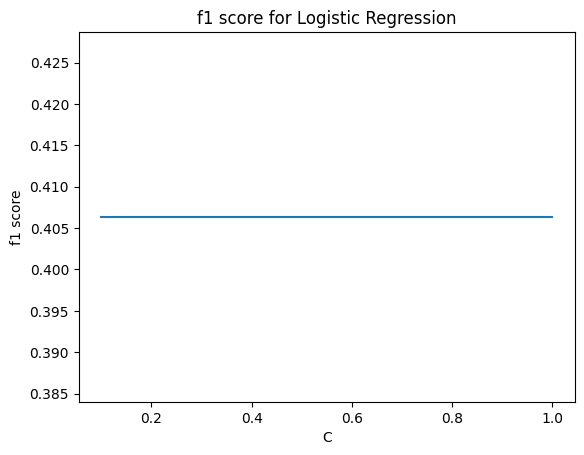

Logistic Regression:  0.4063554284612666  with C =  0.1


In [363]:
plt.title("f1 score for Logistic Regression")
plt.ylabel("f1 score")
plt.xlabel("C")
plt.plot(C_values, f1_scores_lr)
plt.show()

print("Logistic Regression: ", max(f1_scores_lr), " with C = ", C_values[f1_scores_lr.index(max(f1_scores_lr))])

### Random Forest

In [364]:
def random_forest(X_train, X_test, y_train, y_test, n_estimators, max_depth):
    clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [365]:
n_estimators_values = [10, 50, 100, 200, 500]
max_depth_values = [5, 10, 15, 20, 25]
f1_scores_rf = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        f1_scores_rf.append(random_forest(X_train, X_test, y_train, y_test, n_estimators, max_depth))

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (25).

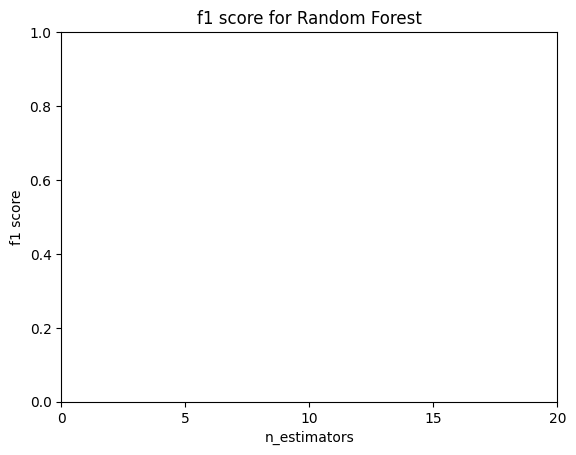

In [367]:
plt.title("f1 score for Random Forest")
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
x_axis = np.arange(0, len(n_estimators_values)*len(max_depth_values), len(max_depth_values))
x_ticks = [str(n_estimators) + " " + str(max_depth) for n_estimators in n_estimators_values for max_depth in max_depth_values]
plt.xticks(x_axis, x_ticks, rotation = 90)
plt.plot(f1_scores_rf)
plt.show()

print("Random Forest: ", max(f1_scores_rf), " with n_estimators = ", n_estimators_values[f1_scores_rf.index(max(f1_scores_rf))//len(max_depth_values)], " and max_depth = ", max_depth_values[f1_scores_rf.index(max(f1_scores_rf))%len(max_depth_values)])

### Random Forest with more estimators and max_depth

In [368]:
n_estimators_values = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
max_depth_values = [10, 15, 20, 25, 30, 35, 40, 45, 50]
f1_scores_rf2 = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        f1_scores_rf2.append(random_forest(X_train, X_test, y_train, y_test, n_estimators, max_depth))

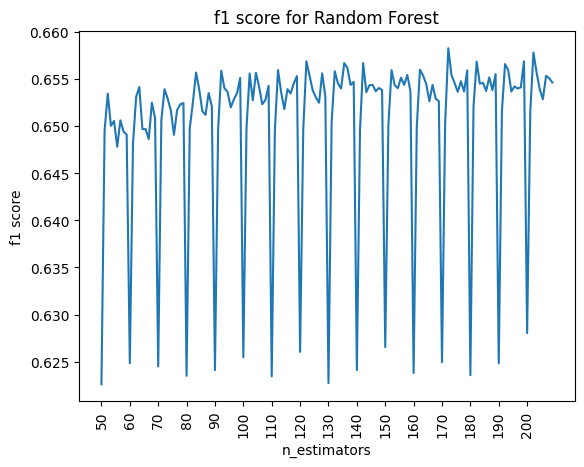

Random Forest:  0.6582591652475661  with n_estimators =  170  and max_depth =  20


In [401]:
n_estimators_values = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
max_depth_values = [10, 15, 20, 25, 30, 35, 40, 45, 50]

plt.title("f1 score for Random Forest")
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
plt.xticks(np.arange(0, len(n_estimators_values)*len(max_depth_values), len(max_depth_values)), n_estimators_values, rotation = 90)
plt.plot(f1_scores_rf2)
plt.show()

print("Random Forest: ", max(f1_scores_rf2), " with n_estimators = ", n_estimators_values[f1_scores_rf2.index(max(f1_scores_rf2))//len(max_depth_values)], " and max_depth = ", max_depth_values[f1_scores_rf2.index(max(f1_scores_rf2))%len(max_depth_values)])

### Decision Tree

In [370]:
def decision_tree(X_train, X_test, y_train, y_test, max_depth):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [371]:
f1_scores_dtree = []
max_depth_values = [5, 10, 15, 20, 25]

for max_depth in max_depth_values:
    f1_scores_dtree.append(decision_tree(X_train, X_test, y_train, y_test, max_depth))

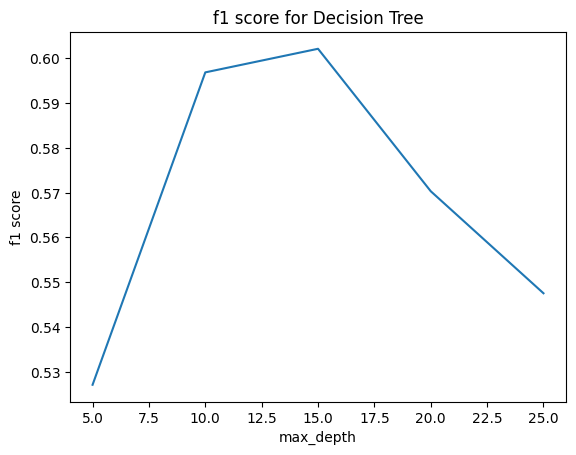

Decision Tree:  0.602127044308068  with max_depth =  15


In [372]:
plt.title("f1 score for Decision Tree")
plt.ylabel("f1 score")
plt.xlabel("max_depth")
plt.plot(max_depth_values, f1_scores_dtree)
plt.show()
    
print("Decision Tree: ", max(f1_scores_dtree), " with max_depth = ", max_depth_values[f1_scores_dtree.index(max(f1_scores_dtree))])

### K-Nearest Neighbors

In [373]:
def knn(X_train, X_test, y_train, y_test, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [374]:
f1_scores_knn = []
n_neighbors_values = [5, 10, 15, 20, 25]

for n_neighbors in n_neighbors_values:
    f1_scores_knn.append(knn(X_train, X_test, y_train, y_test, n_neighbors))

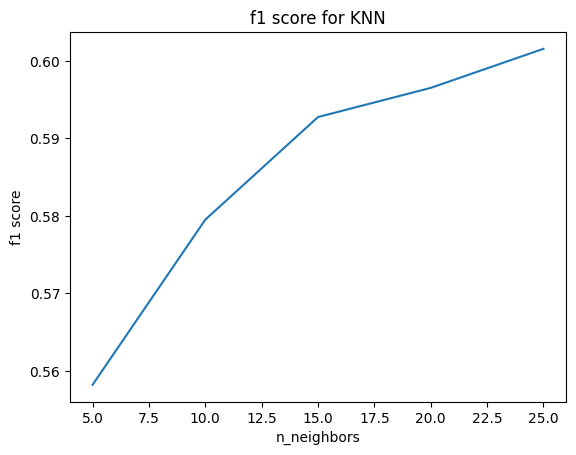

KNN:  0.601548693891977  with n_neighbors =  25


In [375]:
plt.title("f1 score for KNN")
plt.ylabel("f1 score")
plt.xlabel("n_neighbors")
plt.plot(n_neighbors_values, f1_scores_knn)
plt.show()

print("KNN: ", max(f1_scores_knn), " with n_neighbors = ", n_neighbors_values[f1_scores_knn.index(max(f1_scores_knn))])

### Naive Bayes

In [376]:
def naive_bayes(X_train, X_test, y_train, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [377]:
f1_scores_nb = naive_bayes(X_train, X_test, y_train, y_test)

print("Naive Bayes: ", f1_scores_nb)

Naive Bayes:  0.4146129871798991


### Bagging

In [378]:
def bagging(X_train, X_test, y_train, y_test, n_estimators, max_samples):
    clf = BaggingClassifier(n_estimators = n_estimators, max_samples = max_samples)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [379]:
f1_scores_bagging = []
n_estimators_values = [5, 10, 15, 20, 25]
max_samples_values = [0.1, 0.2, 0.3, 0.4, 0.5]

for n_estimators in n_estimators_values:
    for max_samples in max_samples_values:
        f1_scores_bagging.append(bagging(X_train, X_test, y_train, y_test, n_estimators, max_samples))

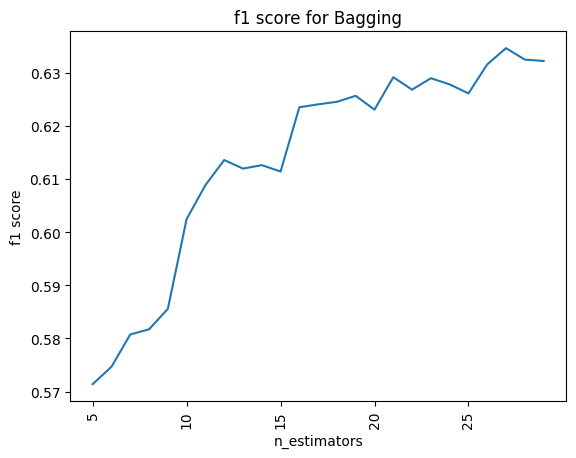

Bagging:  0.6346110593451788  with n_estimators =  25  and max_samples =  0.3


In [402]:
n_estimators_values = [5, 10, 15, 20, 25]
max_samples_values = [0.1, 0.2, 0.3, 0.4, 0.5]

plt.title("f1 score for Bagging")
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
plt.xticks(np.arange(0, len(n_estimators_values)*len(max_samples_values), len(max_samples_values)), n_estimators_values, rotation = 90)
plt.plot(f1_scores_bagging)
plt.show()

print("Bagging: ", max(f1_scores_bagging), " with n_estimators = ", n_estimators_values[f1_scores_bagging.index(max(f1_scores_bagging))//len(max_samples_values)], " and max_samples = ", max_samples_values[f1_scores_bagging.index(max(f1_scores_bagging))%len(max_samples_values)])

### Neural Network

In [381]:
def neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter):
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, max_iter = max_iter)
    clf.fit(X_train, y_train)
    model_prediction = clf.predict(X_test)
    return f1_score(y_test, model_prediction, average = 'micro')

In [382]:
f1_scores_nn = []
hidden_layer_sizes_values = [(5, 5), (10, 10), (15, 15), (20, 20), (25, 25)]
max_iter_values = [100, 200, 300, 400, 500]

for hidden_layer_sizes in hidden_layer_sizes_values:
    for max_iter in max_iter_values:
        f1_scores_nn.append(neural_network(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter))

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


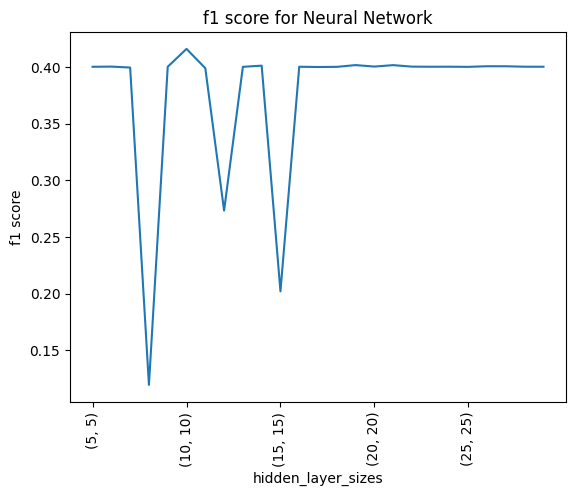

Neural Network:  0.4160267326414549  with hidden_layer_sizes =  (10, 10)  and max_iter =  100


In [403]:
hidden_layer_sizes_values = [(5, 5), (10, 10), (15, 15), (20, 20), (25, 25)]
max_iter_values = [100, 200, 300, 400, 500]

plt.title("f1 score for Neural Network")
plt.ylabel("f1 score")
plt.xlabel("hidden_layer_sizes")
plt.xticks(np.arange(0, len(hidden_layer_sizes_values)*len(max_iter_values), len(max_iter_values)), hidden_layer_sizes_values, rotation = 90)
plt.plot(f1_scores_nn)
plt.show()

print("Neural Network: ", max(f1_scores_nn), " with hidden_layer_sizes = ", hidden_layer_sizes_values[f1_scores_nn.index(max(f1_scores_nn))//len(max_iter_values)], " and max_iter = ", max_iter_values[f1_scores_nn.index(max(f1_scores_nn))%len(max_iter_values)])

In [384]:
all_f1_scores = {"Logistic Regression":0, "Random Forest":0, "Decision Tree":0, "KNN":0, "Naive Bayes":0, "Bagging":0, "Neural Network":0}

all_f1_scores["Logistic Regression"] = max(f1_scores_lr)
all_f1_scores["Random Forest"] = max(max(f1_scores_rf), max(f1_scores_rf2))
all_f1_scores["Decision Tree"] = max(f1_scores_dtree)
all_f1_scores["KNN"] = max(f1_scores_knn)
all_f1_scores["Naive Bayes"] = f1_scores_nb
all_f1_scores["Bagging"] = max(f1_scores_bagging)
all_f1_scores["Neural Network"] = max(f1_scores_nn)

The best model is: Random Forest with f1 score = 0.6591909520290461


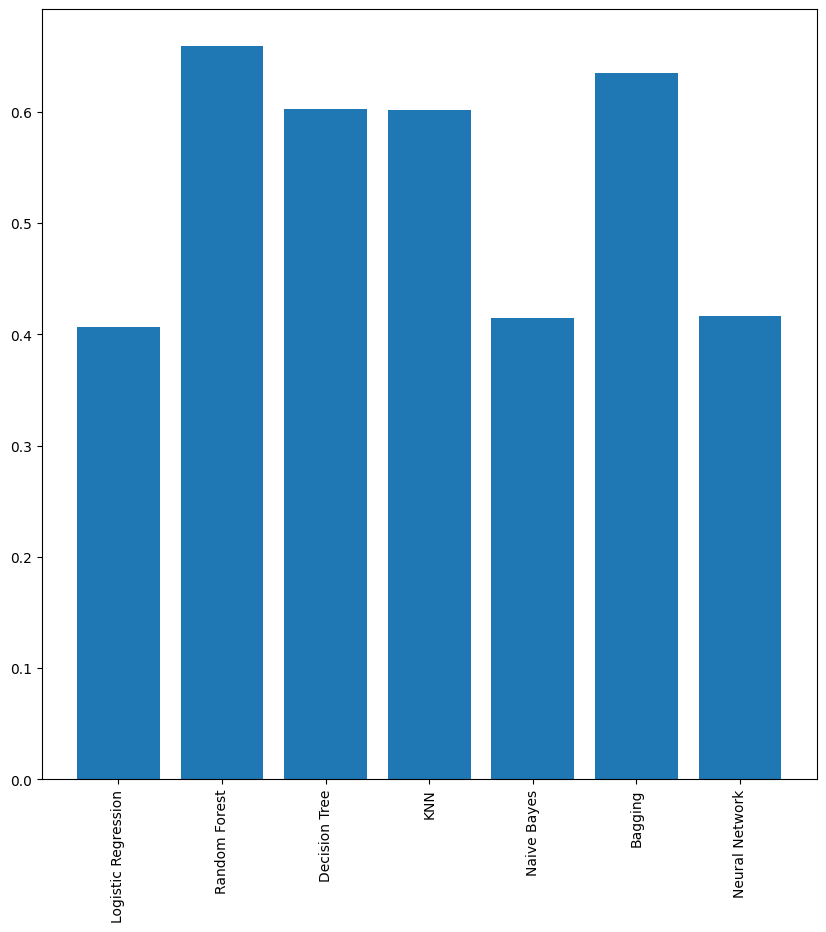

In [385]:
# plot all f1 scores for each model with x axis being the name of the model
# place the name in diagonal to avoid overlapping
plt.figure(figsize = (10, 10))
plt.xticks(rotation = 90)
plt.bar(all_f1_scores.keys(), all_f1_scores.values())

print("The best model is:", max(all_f1_scores, key = all_f1_scores.get), "with f1 score =", max(all_f1_scores.values()))

# Test set predictions

In [386]:
# Random forst with nb_estimators = 130 and max_depth = 20

best_model = RandomForestClassifier(n_estimators = 130, max_depth = 20)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
f1_score(y_test, y_pred, average = 'micro')

0.6557529801111718

In [387]:
# Convert all NaN values in test_data_np to the majority value of the column
from scipy import stats

for i in range(0, test_data_np.shape[1]):
    column = test_data_np[:, i]
    column = column[column >= 0]
    # get the most common value in the column
    most_common_value = int(stats.mode(column)[0])
    # replace all NaN values with the most common value
    test_data_np[:, i][np.isnan(test_data_np[:, i])] = most_common_value


C:\Users\shahr\AppData\Local\Temp\ipykernel_3176\2473199210.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common_value = int(stats.mode(column)[0])


In [388]:
best_y_pred = best_model.predict(test_data_np)

In [389]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concer Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Enjoyed              0.463147
Did Not Enjoy        0.456365
Worst Concer Ever    0.053191
Best Concert Ever    0.027297
Name: Predicted, dtype: float64

In [390]:
# analyze number of enjoyment in train data as a proportion of total values
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64